# Illustration of bootstrap results in a heatmap

This script creates a dataframe of the bootstrap results of all conditions and produces a heatmap for illustration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import pickle
from scipy import spatial
from scipy.spatial import distance
import scipy.stats as st
import os
import copy

Load bootstrapped means

In [2]:
ofc1_df = np.load('/Users/jenniferthem/Masterthesis_Data/Bootstrap/bootstrap_ofc1', allow_pickle=True)
ofc2_df = np.load('/Users/jenniferthem/Masterthesis_Data/Bootstrap/bootstrap_ofc2', allow_pickle=True)
ofc3_df = np.load('/Users/jenniferthem/Masterthesis_Data/Bootstrap/bootstrap_ofc3', allow_pickle=True)
ofc4_df = np.load('/Users/jenniferthem/Masterthesis_Data/Bootstrap/bootstrap_ofc4', allow_pickle=True)
ofc5_df = np.load('/Users/jenniferthem/Masterthesis_Data/Bootstrap/bootstrap_ofc5', allow_pickle=True)
ofc6_df = np.load('/Users/jenniferthem/Masterthesis_Data/Bootstrap/bootstrap_ofc6', allow_pickle=True)
ofc7_df = np.load('/Users/jenniferthem/Masterthesis_Data/Bootstrap/bootstrap_ofc7', allow_pickle=True)
fp2_df = np.load('/Users/jenniferthem/Masterthesis_Data/Bootstrap/bootstrap_fp2', allow_pickle=True)
r25_df = np.load('/Users/jenniferthem/Masterthesis_Data/Bootstrap/bootstrap_25', allow_pickle=True)
s32_df = np.load('/Users/jenniferthem/Masterthesis_Data/Bootstrap/bootstrap_s32', allow_pickle=True)
p24ab_df = np.load('/Users/jenniferthem/Masterthesis_Data/Bootstrap/bootstrap_p24ab', allow_pickle=True)
p24c_df= np.load('/Users/jenniferthem/Masterthesis_Data/Bootstrap/bootstrap_p24c', allow_pickle=True)
r33_df = np.load('/Users/jenniferthem/Masterthesis_Data/Bootstrap/bootstrap_33', allow_pickle=True)
p32_df = np.load('/Users/jenniferthem/Masterthesis_Data/Bootstrap/bootstrap_p32', allow_pickle=True)
s24_df = np.load('/Users/jenniferthem/Masterthesis_Data/Bootstrap/bootstrap_s24', allow_pickle=True)
caudate_df= np.load('/Users/jenniferthem/Masterthesis_Data/Bootstrap/bootstrap_caudate', allow_pickle=True)
putamen_df= np.load('/Users/jenniferthem/Masterthesis_Data/Bootstrap/bootstrap_putamen', allow_pickle=True)
nacc_df= np.load('/Users/jenniferthem/Masterthesis_Data/Bootstrap/bootstrap_nacc', allow_pickle=True)

mean of the bootstrap

In [3]:
ofc1_mean = ofc1_df.mean()
ofc2_mean = ofc2_df.mean()
ofc3_mean = ofc3_df.mean()
ofc4_mean = ofc4_df.mean()
ofc5_mean = ofc5_df.mean()
ofc6_mean = ofc6_df.mean()
ofc7_mean = ofc7_df.mean()
fp2_mean = fp2_df.mean()
r25_mean = r25_df.mean()
s32_mean = s32_df.mean()
p24ab_mean = p24ab_df.mean()
p24c_mean = p24c_df.mean()
r33_mean = r33_df.mean()
p32_mean = p32_df.mean()
s24_mean = s24_df.mean()
caudate_mean = caudate_df.mean()
putamen_mean = putamen_df.mean()
nacc_mean = nacc_df.mean()

In [5]:
# Nested dictionary: for outer layer Ketamine, Placebo and Ketamine-Placebo
# inner layer: 
bootstrap_mean_dict = {}
roi_val_dict = {}
roi_keys = ['OFC1', 'OFC2', 'OFC3', 'OFC4', 'OFC5', 'OFC6', 'OFC7', 'FP2', '25', 's24', 's32','33', 'p24ab', 'p24c', 'p32', 'Putamen', 'NAcc', 'Caudate']
keys = ['Ketamine', 'Placebo', 'Ketamine-Placebo']
roi_list = [ofc1_mean, ofc2_mean, ofc3_mean, ofc4_mean, ofc5_mean, ofc6_mean, ofc7_mean, fp2_mean, r25_mean,  s24_mean, s32_mean, r33_mean, p24ab_mean, p24c_mean, p32_mean, putamen_mean, nacc_mean, caudate_mean]

# loop through all conditions
for key in keys:
    i=0
    #print(key)
    # loop through all ROIs
    for entry in roi_list:
        #print(entry)
        roi_name=roi_keys[i]
        # fill inner dictionary: {ROI:mean_bootstrap}
        roi_val_dict[roi_name] = entry[key]
        i+=1
    # fill outer dictionary: {Conditon: {inner dictionary}}    
    # make deepcopy!
    bootstrap_mean_dict[key] = copy.deepcopy(roi_val_dict)


data is the mean of the bootstrapped distribution of distances to centroids

In [6]:
data = pd.DataFrame.from_dict(bootstrap_mean_dict, orient='columns')

In [7]:
data

,Ketamine,Placebo,Ketamine-Placebo
OFC1,-0.304593,-0.095718,-0.209391
OFC2,-0.262944,-0.120087,-0.142706
OFC3,-0.038874,-0.350526,0.312059
OFC4,0.159717,-0.207426,0.366132
OFC5,0.360339,-0.390683,0.751703
OFC6,-0.080066,-0.279005,0.198788
OFC7,-0.065004,-0.347716,0.282418
FP2,0.121962,-0.156741,0.278717
25,0.044473,-0.113438,0.157149
s24,0.842712,-0.233593,1.075222


In [8]:
np.amin(data)

Ketamine           -0.304593
Placebo            -0.639876
Ketamine-Placebo   -0.216237
dtype: float64

In [9]:
np.amax(data)

Ketamine            0.859200
Placebo             0.065288
Ketamine-Placebo    1.101400
dtype: float64

<IPython.core.display.Javascript object>


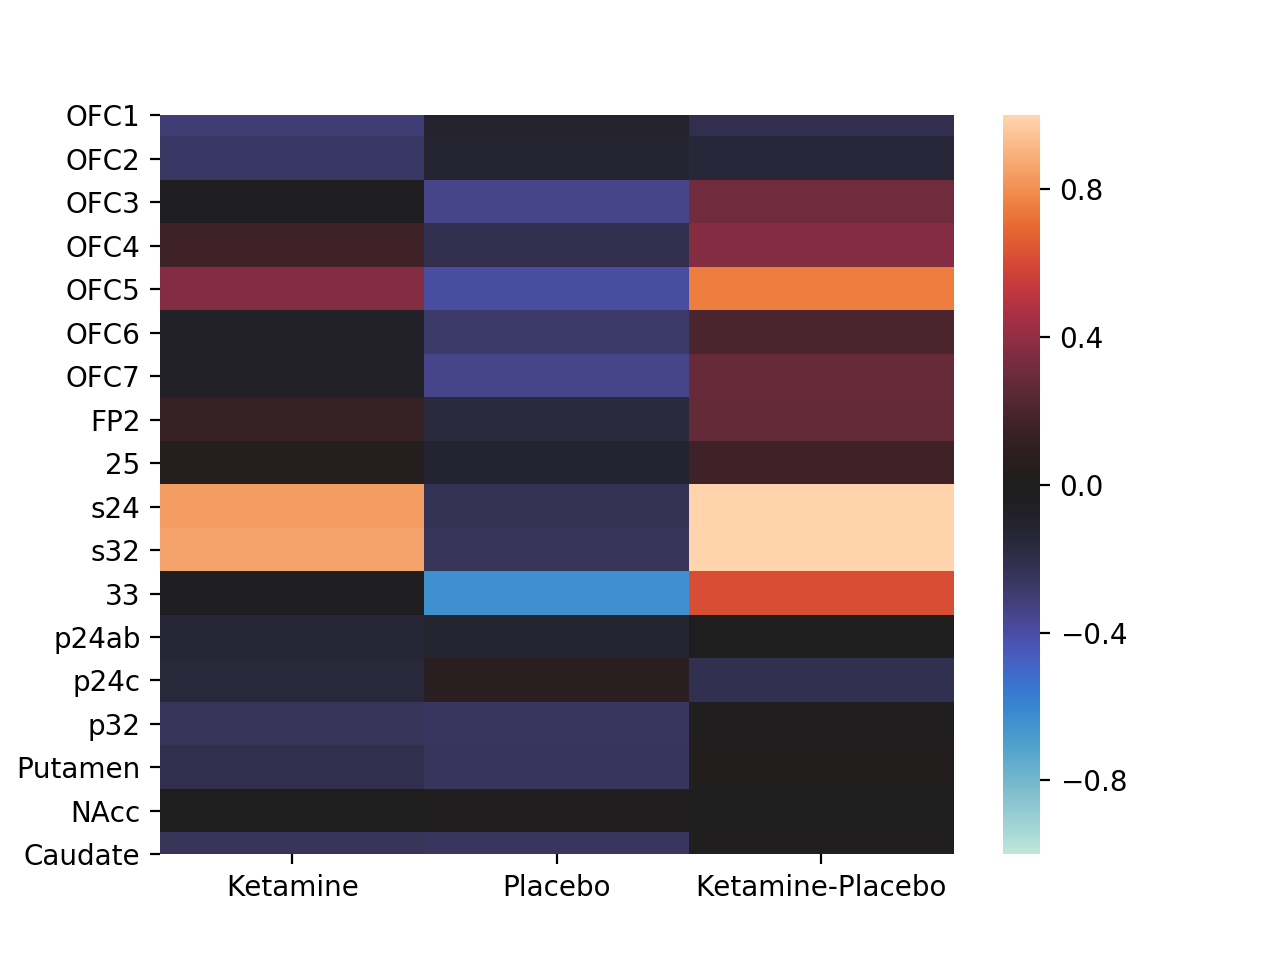

In [11]:
%matplotlib notebook
sns.heatmap(data, vmin=-1, vmax=1, center=0)
plt.savefig('/Users/jenniferthem/Masterthesis_Data/Bootstrap/bootstrap_mean_heatmap', dpi=250)

Choosing s32 and s24 for further between ROI region analysis